In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import cv2
import PIL.Image as Image

In [ ]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

228827136/228813984 [==============================] - 8s 0us/step


In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

#image_count = len(list(data_dir.glob('flower_photos/*/*.jpg')))
#print(image_count)

3670


# Let's explore the images in this dataset

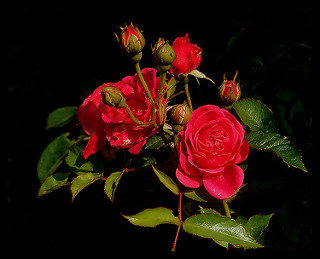

In [ ]:
roses = list(data_dir.glob('roses/*'))
Image.open(str(roses[10]))

#roses = list(data_dir.glob('flower_photos/roses/*'))
#Image.open(str(roses[10]))

In [ ]:
roses[:5]

[PosixPath('/root/.keras/datasets/flower_photos/roses/1667199972_7ba7d999c1_m.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/roses/24781114_bc83aa811e_n.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/roses/1461381091_aaaa663bbe_n.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/roses/15681454551_b6f73ce443_n.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/roses/20596941736_f2c5f496cf.jpg')]

In [ ]:
type(Image.open(str(roses[10])))

PIL.JpegImagePlugin.JpegImageFile

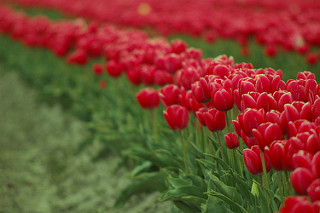

In [ ]:
tulips = list(data_dir.glob('tulips/*'))
Image.open(str(tulips[0]))

#tulips = list(data_dir.glob('flower_photos/tulips/*'))
#Image.open(str(tulips[0]))

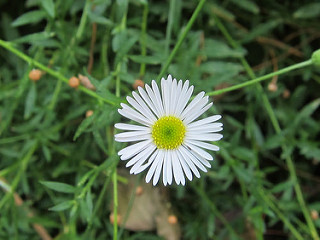

In [ ]:
daisy = list(data_dir.glob('daisy/*'))
Image.open(str(daisy[0]))

#daisy = list(data_dir.glob('flower_photos/daisy/*'))
#Image.open(str(daisy[4]))

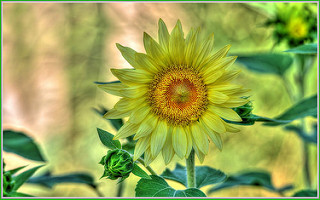

In [ ]:
sunflower = list(data_dir.glob('sunflowers/*'))
Image.open(str(sunflower[0]))

#sunflowers = list(data_dir.glob('flower_photos/sunflowers/*'))
#Image.open(str(sunflowers[40]))


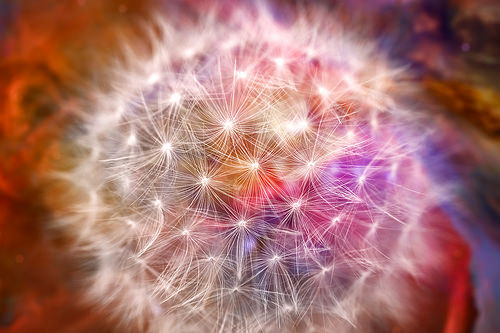

In [ ]:
dandelion = list(data_dir.glob('dandelion/*'))
Image.open(str(dandelion[12]))

#dandelions = list(data_dir.glob('flower_photos/dandelion/*'))
#Image.open(str(dandelions[4]))

In [ ]:
cv2.imread(str(dandelion[12]))

array([[[ 59,  53,  72],
        [ 59,  52,  73],
        [ 54,  51,  73],
        ...,
        [ 39,  44,  89],
        [ 40,  43,  88],
        [ 39,  42,  86]],

       [[ 59,  53,  72],
        [ 58,  51,  72],
        [ 55,  49,  72],
        ...,
        [ 40,  45,  90],
        [ 41,  44,  88],
        [ 40,  43,  87]],

       [[ 61,  52,  72],
        [ 58,  51,  72],
        [ 55,  49,  72],
        ...,
        [ 42,  48,  91],
        [ 41,  47,  90],
        [ 42,  45,  89]],

       ...,

       [[  7,  30, 110],
        [  7,  30, 110],
        [  8,  31, 111],
        ...,
        [ 59,  51,  74],
        [ 63,  52,  72],
        [ 64,  53,  69]],

       [[  5,  30, 116],
        [  5,  30, 116],
        [  5,  30, 116],
        ...,
        [ 59,  51,  74],
        [ 63,  52,  72],
        [ 64,  53,  69]],

       [[  4,  28, 118],
        [  5,  29, 119],
        [  5,  29, 119],
        ...,
        [ 59,  51,  74],
        [ 63,  52,  72],
        [ 64,  53,  69]]

In [ ]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

#flowers_images_dict = {
#    'roses': list(data_dir.glob('flower_photos/roses/*')),
#    'daisy': list(data_dir.glob('flower_photos/daisy/*')),
#    'dandelion': list(data_dir.glob('flower_photos/dandelion/*')),
#    'sunflowers': list(data_dir.glob('flower_photos/sunflowers/*')),
#    'tulips': list(data_dir.glob('flower_photos/tulips/*')),
#}

In [ ]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

# Let's check shape of the input image

In [ ]:
img1 = cv2.imread(str(flowers_images_dict['roses'][0]))
img1.shape

(240, 180, 3)

In [ ]:
img2 = cv2.imread(str(flowers_images_dict['dandelion'][0]))
img2.shape

(240, 235, 3)

In [ ]:
img3 = cv2.imread(str(flowers_images_dict['sunflowers'][0]))
img3.shape

(200, 320, 3)

In [ ]:
cv2.resize(img1,(299,299)).shape

(299, 299, 3)

In [ ]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(299,299))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [ ]:
import numpy as np

X = np.array(X)
y = np.array(y)

In [ ]:
#splitting input data into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
#normalising/ standardising the input numerical pixel dataset to scale the values between 0 and 1

X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [ ]:
X[0].shape

(299, 299, 3)

In [ ]:
type(X[0])

numpy.ndarray

In [ ]:
X_train_scaled[0].shape

(299, 299, 3)

# Transfer learning using inception v3

In [ ]:
feature_extractor_model = "https://tfhub.dev/google/imagenet/inception_v3/classification/5"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(299, 299, 3), trainable=False)

In [ ]:
# import tf_keras
num_of_flowers = 5

model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_flowers)
])

model.summary()

#model = tf_keras.Sequential([
#    pretrained_model_without_top_layer,
#   tf_keras.layers.Dense(num_of_flowers)
#])

#model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              23853833  
                                                                 
 dense (Dense)               (None, 5)                 5010      
                                                                 
Total params: 23,858,843
Trainable params: 5,010
Non-trainable params: 23,853,833
_________________________________________________________________


In [ ]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
86/86 [==============================] - 21s 76ms/step - loss: 0.7179 - acc: 0.7315
Epoch 2/5
86/86 [==============================] - 7s 76ms/step - loss: 0.4020 - acc: 0.8594
Epoch 3/5
86/86 [==============================] - 6s 75ms/step - loss: 0.3262 - acc: 0.8888
Epoch 4/5
86/86 [==============================] - 6s 75ms/step - loss: 0.2826 - acc: 0.9062
Epoch 5/5
86/86 [==============================] - 6s 76ms/step - loss: 0.2560 - acc: 0.9172


In [ ]:
model.evaluate(X_test_scaled,y_test)


29/29 [==============================] - 3s 90ms/step - loss: 0.3560 - acc: 0.8780


[0.3560025691986084, 0.8779956698417664]

In [ ]:
predictions = model.predict(np.array([X[0],X[11],X[12]]))
predictions

array([[ 111.54535  ,  -63.19526  , -158.92061  ,   -2.9659865,
          88.58973  ],
       [  54.63725  ,   -8.6992655,  -48.947243 ,  -19.010862 ,
          22.899097 ],
       [ 164.0354   , -129.66025  , -239.79912  , -116.81991  ,
         133.6949   ]], dtype=float32)

In [ ]:
predictions_out = np.argmax(predictions,axis=1)
predictions_out

array([0, 0, 0])

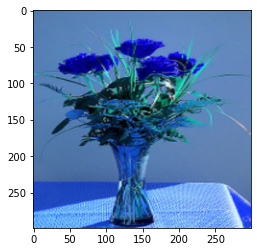

0


In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X[0])
plt.show()

print(y[0])

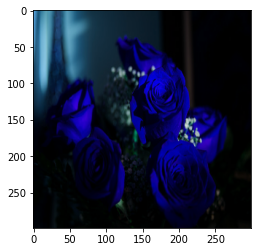

0


In [ ]:
plt.imshow(X[11])
plt.show()

print(y[11])

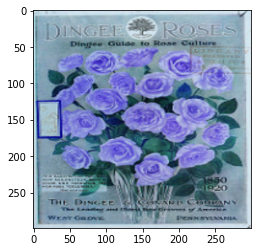

0


In [ ]:
plt.imshow(X[12])
plt.show()

print(y[12])